## LOAD PACKAGES

In [44]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as  plt
import seaborn as sns
%matplotlib inline

## LOADING DATA

In [45]:
olympic_df = pd.read_csv('athlete_events.csv', index_col = 'ID')
olympic_df.head(20)

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
ID,,,,,,,,,,,,,,
1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN


A couple of early observations, upon loading the data:
    <ul>
    <li>NA in the Medal column have been converted to NaN, needs correcting.
    <li>It looks like Games is just a concat of Year + Season, should remove, once checked.
    <li>There's some NaN's in the Height & Weight Column , will need to be cleaned if using these columns.
    <\ul>

## CONVERTING NaN to None in Medals

In [46]:
olympic_df['Medal'] = olympic_df['Medal'].fillna("None")
olympic_df['Medal'].head()

ID
1    None
2    None
3    None
4    Gold
5    None
Name: Medal, dtype: object

## Loading the NOC dataset
###### NOC dataset to get a better representation of where an athlete is from over 'Team' variable.

In [47]:
NOC = pd.read_csv('noc_regions.csv')
NOC

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN
...,...,...,...
225,YEM,Yemen,NaN
226,YMD,Yemen,South Yemen
227,YUG,Serbia,Yugoslavia
228,ZAM,Zambia,NaN


In [48]:
NOC['region'].replace(['US', 'USA', 'UK', 'Saint Kitts', 'Trinidad', 'Boliva', 'Virgin Islands, US', 'Curacao'], 
                      ['United States', 'United States', 'United Kingdom', 'Saint Kitts and Nevis', 'Trinidad and Tobago', 'Bolivia', 'US Virgin Islands', 'Cura̤ao'], 
                      inplace = True)
NOC

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Cura̤ao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN
...,...,...,...
225,YEM,Yemen,NaN
226,YMD,Yemen,South Yemen
227,YUG,Serbia,Yugoslavia
228,ZAM,Zambia,NaN


## MERGING DATAFRAME

In [49]:
olympic_df = pd.merge(olympic_df, NOC, left_on='NOC', right_on='NOC')

In [50]:
#before discarding, check to see if Games is in Year + Season for all values, then discard. 
if (olympic_df['Games'].equals(olympic_df['Year'].map(str) + " " +olympic_df['Season'])):
    olympic_df = olympic_df.drop(['notes', 'Games'], axis=1)
else: 
    olympic_df = olympic_df.drop(['notes'], axis=1)

In [51]:
olympic_df

,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal,region
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None,China
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None,China
2,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,None,China
3,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",None,China
4,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,None,China
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270762,Mamorallo Tjoka,F,23.0,150.0,56.0,Lesotho,LES,2008,Summer,Beijing,Athletics,Athletics Women's Marathon,None,Lesotho
270763,Mamorallo Tjoka,F,27.0,150.0,56.0,Lesotho,LES,2012,Summer,London,Athletics,Athletics Women's Marathon,None,Lesotho
270764,M'apotlaki Ts'elho,F,15.0,NaN,NaN,Lesotho,LES,1996,Summer,Atlanta,Athletics,Athletics Women's 4 x 100 metres Relay,None,Lesotho
270765,Lefa Tsapi,M,23.0,170.0,63.0,Lesotho,LES,1984,Summer,Los Angeles,Boxing,Boxing Men's Welterweight,None,Lesotho


## CHECK  NULL VALUES

In [52]:
null_list = [(col, olympic_df[col].isnull().sum()) for col in olympic_df.columns]

df_nulls = pd.DataFrame(null_list)
df_nulls

,0,1
0,Name,0
1,Sex,0
2,Age,9462
3,Height,60083
4,Weight,62785
5,Team,0
6,NOC,0
7,Year,0
8,Season,0
9,City,0


In [53]:
#find out which points haven't merged properly
missing_region_datapoints = olympic_df[olympic_df.region.isnull()]
print(len(missing_region_datapoints))
missing_region_datapoints.sample(5)

21


,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal,region
270688,Okilani Tinilau,M,19.0,NaN,NaN,Tuvalu,TUV,2008,Summer,Beijing,Athletics,Athletics Men's 100 metres,None,NaN
264745,Rose Nathike Lokonyen,F,21.0,157.0,50.0,Refugee Olympic Athletes,ROT,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 800 metres,None,NaN
270686,Tavevele Noa,M,20.0,176.0,74.0,Tuvalu,TUV,2012,Summer,London,Athletics,Athletics Men's 100 metres,None,NaN
264738,Rami Anis,M,25.0,178.0,78.0,Refugee Olympic Athletes,ROT,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 100 metres Freestyle,None,NaN
264744,Anjelina Nadai Lohalith,F,23.0,163.0,50.0,Refugee Olympic Athletes,ROT,2016,Summer,Rio de Janeiro,Athletics,"Athletics Women's 1,500 metres",None,NaN


In [54]:
# remove rows with NaN in the region column, using prints to check
print(len(olympic_df))
olympic_df = olympic_df[pd.notnull(olympic_df['region'])]
print(len(olympic_df))

270767
270746


## FINDING PROPORTION

In [55]:
#Proportion 
ProportionMvW = olympic_df.groupby(['Year', 'Sex']).agg({'Name': 'count'})

percentages = ProportionMvW.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
percentages = percentages.reset_index()

## PLOTTING USING SEABORN

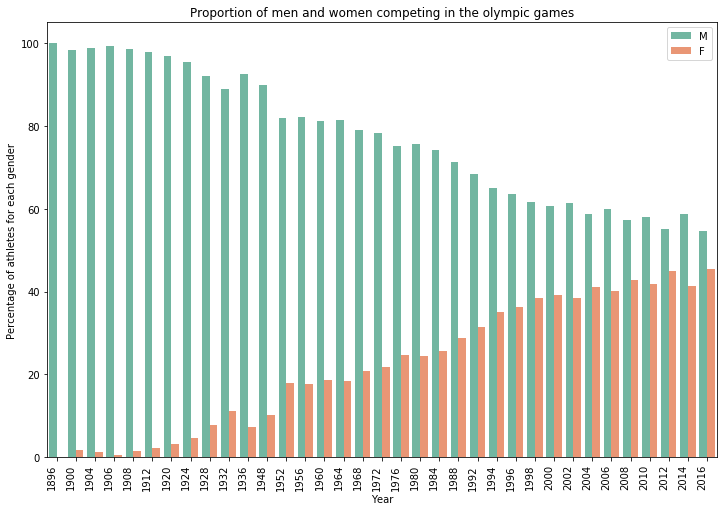

In [58]:
fig, ax = plt.subplots(figsize=(12, 8))

ax = sns.barplot(x="Year", y="Name", hue="Sex", data=percentages, palette="Set2") 
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax.set_title('Proportion of men and women competing in the olympic games')
ax.set_ylabel('Percentage of athletes for each gender')
ax.legend(loc="upper right")
plt.show()